The autograder will run with the following imports (and only the following imports). As both of these imports are required, in order to work on this assignment locally, you should follow the instructions on the webpage. 

In [118]:
import mmh3
import BitVector as bv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

For this MP, you will be using the [mmh3 hash](https://pypi.org/project/mmh3/). This hash is very efficient and great for real world data although ironically the data provided and used by the autograder will be using it in exactly the wrong context. To quote the authors:

*As MurMur3 creates a fairly big print (128 bits), so it’s not recommended to use it for hashing small data sets like words, short strings, integers and so on. The embedded hash functions for these simple and small data types provide excellent performance with low collision rate. So anything that is less than a couple dozen, or preferably hundreds of bytes is not a good candidate.*

In [6]:
#INPUT:
# A hashable datatype (probably string) value containing the object being hashed
# An optional integer argument seed storing the seed to provide mmh3
#OUTPUT:
# An integer value containing the output hash value for the input object

def seededHash(value, seed=None):
    if seed:
        return mmh3.hash(value, seed)
    return mmh3.hash(value)

In [7]:
#grade

#INPUT:
# A set (inSet) storing the collection of hashable values that define a single object
# An integer (k) storing the number of hash minima you need to keep track of
# An optional argument (seed) which sets the random seed used to generate the hash function
#OUTPUT:
# A set of integers storing the k-minimum hash values produced by passing each item in inSet through seededHash
def minHash(inSet, k, seed=None):
    h = []
    for item in inSet:
        h.append(seededHash(item, seed)) 
    return set(sorted(h)[:k])

In [8]:
#grade

#INPUT:
# A set (inSet) storing the collection of hashable values that define a single object
# An integer (m) storing the size of the bloom filter being constructed
# Two optional integer arguments (hs1 and hs2) storing hash seeds for the BF's first and second hash
#OUTPUT:
# A BitVector of size m containing all input items hashed using both hs1 and hs2 seeds
def bloomFilter(inSet, m, hs1=0, hs2=10):
    h = bv.BitVector(size = m)
    for item in inSet:
        h1 = seededHash(item, hs1) % m
        h2 = seededHash(item, hs2) % m
        h[h1] = 1
        h[h2] = 1
    return h

In [9]:
#grade

#INPUT:
# Two input sets (inSet1 and inSet2) containing sets of the same hashable data type
#OUTPUT:
# A float value between 0 and 1 corresponding to the Jaccard similarity between input sets
# NOTE: You can use this function to calculate the exact similarity between raw datasets
# and also the Minhash similarity (since a Minhash sketch is *literally* just a set)
def jaccard(inSet1, inSet2):
    #YOUR CODE HERE
    intersection = inSet1.intersection(inSet2)
    hap = inSet1.union(inSet2)
    sim = len(intersection)/len(hap)
    return sim

In [10]:
#grade

#INPUT:
# Two input BitVectors (bf1 and bf2) containing two equal length bloom filters
#OUTPUT:
# A float value between 0 and 1 corresponding to the Jaccard similarity between input sets
def bf_jaccard(bf1, bf2):
    #YOUR CODE HERE
    union_count = 0
    intersect_count = 0
    a = list(bf1)
    b = list(bf2)
    for i in range(len(a)):
        if (a[i] == 1 and b[i] == 1):
            intersect_count +=1
            union_count +=1
        elif (a[i] != 1 and b[i] == 1) or (a[i] == 1 and b[i] != 1):
            union_count +=1
    return intersect_count / union_count

In [11]:
#grade

#INPUT:
# A BitVector object bf, containing a bloom filter
# A hashable data type (probably string) val, containing the value being searched for
# Two optional integer arguments storing hash seeds for the BF's first and second hash
#OUTPUT:
# A bool (True or False) based on whether or not val is present in BF.
# NOTE: The Bloom Filter is probabilistic and some of the time will return 'True' 
# even if the item is not present.
def bf_find(bf, val, hs1=0, hs2=10):
    #YOUR CODE HERE
    h1 = seededHash(val, hs1) % len(str(bf))
    h2 = seededHash(val, hs2) % len(str(bf))
    if bf[h1] == 1 and bf[h2] == 1:
        return True
    else:
        return False

Run-Code

In [12]:
# An example on how to use seededHash
print(seededHash('From', seed=4))

s1 = set(["1", "2", "3", "4", "5", "6", "7", "8"])
s2 = set(["11", "12", "13", "4", "5", "16", "17", "18"])
s3 = set(["11", "12", "13", "24", "25", "6", "17", "18"])

k = 3
mh1 = minHash(s1, k)
mh2 = minHash(s2, k)
mh3 = minHash(s3, k)

m = 50
bf1 = bloomFilter(s1, m)
bf2 = bloomFilter(s2, m)
bf3 = bloomFilter(s3, m)

print("raw:", jaccard(s1, s2)) #0.14285714285714285
print("mh:", jaccard(mh1, mh2)) #0.0
print("bf:", bf_jaccard(bf1, bf2)) #0.21739130434782608

print("raw:", jaccard(s1, s3)) # 0.06666666666666667
print("mh:",jaccard(mh1, mh3)) # 0.0
print("bf:",bf_jaccard(bf1, bf3)) #0.16666666666666666

print("raw:",jaccard(s2, s3)) # 0.45454545454545453
print("mh:",jaccard(mh2, mh3)) # 0.5
print("bf:",bf_jaccard(bf2, bf3)) # 0.5555555555555556

# BF will 100% of the time give the correct answer for items that exist
findValue = "11"
print(bf_find(bf1,findValue))
print(bf_find(bf2, findValue))
print(bf_find(bf3, findValue))

# A small percentage of the time it will think an item exists that was not in the set
findValue = "9"
print(bf_find(bf1,findValue))
print(bf_find(bf2, findValue))
print(bf_find(bf3, findValue))


601558399
raw: 0.14285714285714285
mh: 0.0
bf: 0.21739130434782608
raw: 0.06666666666666667
mh: 0.0
bf: 0.16666666666666666
raw: 0.45454545454545453
mh: 0.5
bf: 0.5555555555555556
False
True
True
True
False
False


In [13]:
s1 = set(["1", "2", "3", "4", "5", "6", "7", "8"])
s2 = set(["11", "12", "13", "4", "5", "16", "17", "18"])
s3 = set(["11", "12", "13", "24", "25", "6", "17", "18"])
m = 50
bf1 = bloomFilter(s1, m)
bf2 = bloomFilter(s2, m)
bf3 = bloomFilter(s3, m)
print(bf1,bf2,bf3)

10001001001001001001010000011000001000100001001000 00010100001001000000000101111010001000010000100100 00010110001000100000000101101000000000110000101100


Here's an example of a dataset analysis of just two items (using fixed values of k and m)! You should not use these same values without considering or testing alternatives, they likely won't work for your dataset.

In [14]:
dataset0 = set()
dataset1 = set()

with open("data/stringSet_0.txt") as myFile: #Open the file as a 'reader'
    for line in myFile: # For each line in the file
        if line: # A simple way to write 'if line exists' (is non empty)
            line = line.strip()
            dataset0.add(line)
            
with open("data/stringSet_1.txt") as myFile: #Open the file as a 'reader'
    for line in myFile: # For each line in the file
        if line: # A simple way to write 'if line exists' (is non empty)
            line = line.strip()
            dataset1.add(line)

k = 10
mh0 = minHash(dataset0, k)
mh1 = minHash(dataset1, k)

m = 6000 
bf0 = bloomFilter(dataset0, m)
bf1 = bloomFilter(dataset1, m)

print("raw:", jaccard(dataset0, dataset1)) #0.3309557774607703
print("mh:", jaccard(mh0, mh1)) #When k= 10, 0.3333333333333333
print("bf:", bf_jaccard(bf0, bf1)) #When m=6000, 0.48413747521480505

FileNotFoundError: [Errno 2] No such file or directory: 'data/stringSet_0.txt'

In [66]:
# practice cell
with open('bruno-mars.txt', 'r') as file:
    artist_bruno = file.read().rstrip()
    artist_bruno = artist_bruno.lower().split()
artist_bruno

with open('positive-words.txt', 'r') as file:
    positive_words = file.read().rstrip()
positive_words = positive_words.lower().split()
len(positive_words)

2005

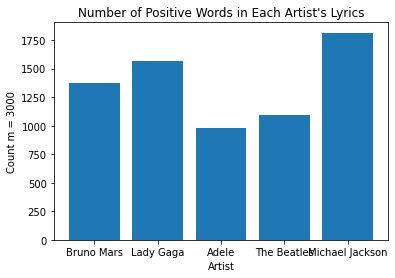

In [80]:
#Bloom Filter positive word visualization

# Artist 1
with open('bruno-mars.txt', 'r') as file:
    artist_bruno = file.read().rstrip()
# Artist 2
with open('lady-gaga.txt', 'r') as file:
    artist_ladygg = file.read().rstrip()
# Artist 3
with open('beatles.txt', 'r') as file:
    artist_beatles = file.read().rstrip()
# Artist 4
with open('adele.txt', 'r') as file:
    artist_adele = file.read().rstrip()
# Artist 5
with open('michael-jackson.txt', 'r') as file:
    artist_michaeljackson = file.read().rstrip()

# List of positive words
with open('positive-words.txt', 'r') as file:
    positive_words = file.read().rstrip()
positive_words = positive_words.lower().split()

artists = ["Bruno Mars", "Lady Gaga", "Adele", "The Beatles", "Michael Jackson"]

lyrics_sets = [set(artist_bruno.lower().split()),set(artist_ladygg.lower().split()),set(artist_adele.lower().split()),set(artist_beatles.lower().split()),set(artist_michaeljackson.lower().split())]

m = 3000
bloom_filters = [bloomFilter(s, m) for s in lyrics_sets]

# function that finds whether the query word is in the lyrics or not
def find_common_words(bloom_filters, query_word, m, hs1=0, hs2=10):
    common_artists = []
    h1 = seededHash(query_word, hs1) % m
    h2 = seededHash(query_word, hs2) % m
    for i, bloom_filter in enumerate(bloom_filters):
        if bloom_filter[h1] == 1 and bloom_filter[h2] == 1:
            common_artists.append(i + 1)
    return common_artists


# code that counts number of positive words in the lyrics
positive_counts = [0] * len(lyrics_sets)
for word in positive_words:
    common_artists = find_common_words(bloom_filters, word, m)
    for artist in common_artists:
        positive_counts[artist-1] += 1

# Visualizing the word count with a histogram
plt.bar(artists, positive_counts)
plt.title("Number of Positive Words in Each Artist's Lyrics")
plt.xlabel("Artist")
plt.ylabel("Count m = " + str(m))
plt.show()


In [115]:
#Minhash Jaccard

# Artist 1
with open('bruno-mars.txt', 'r') as file:
    artist_bruno = file.read().rstrip()
# Artist 2
with open('lady-gaga.txt', 'r') as file:
    artist_ladygg = file.read().rstrip()
# Artist 3
with open('beatles.txt', 'r') as file:
    artist_beatles = file.read().rstrip()
# Artist 4
with open('adele.txt', 'r') as file:
    artist_adele = file.read().rstrip()
# Artist 5
with open('michael-jackson.txt', 'r') as file:
    artist_michaeljackson = file.read().rstrip()

artists_lyrics = [artist_bruno, artist_ladygg, artist_beatles, artist_adele, artist_michaeljackson]

k = 100000

signatures = []
for lyrics in artists_lyrics:
    words = set(lyrics.lower().split())
    signature = minHash(words, k)
    signatures.append(signature)

for i in range(len(signatures)):
    for j in range(i+1, len(signatures)):
        sim = len(signatures[i].intersection(signatures[j])) / len(signatures[i].union(signatures[j]))
        print(f"Estimated Jaccard similarity between Artist {i+1} and Artist {j+1}: {sim}")


Estimated Jaccard similarity between Artist 1 and Artist 2: 0.2435399039560942
Estimated Jaccard similarity between Artist 1 and Artist 3: 0.22684414864115363
Estimated Jaccard similarity between Artist 1 and Artist 4: 0.24483687518706973
Estimated Jaccard similarity between Artist 1 and Artist 5: 0.2270367054610564
Estimated Jaccard similarity between Artist 2 and Artist 3: 0.20244200244200244
Estimated Jaccard similarity between Artist 2 and Artist 4: 0.22283464566929134
Estimated Jaccard similarity between Artist 2 and Artist 5: 0.21758569299552907
Estimated Jaccard similarity between Artist 3 and Artist 4: 0.2512873326467559
Estimated Jaccard similarity between Artist 3 and Artist 5: 0.20170616113744075
Estimated Jaccard similarity between Artist 4 and Artist 5: 0.20587651379789557


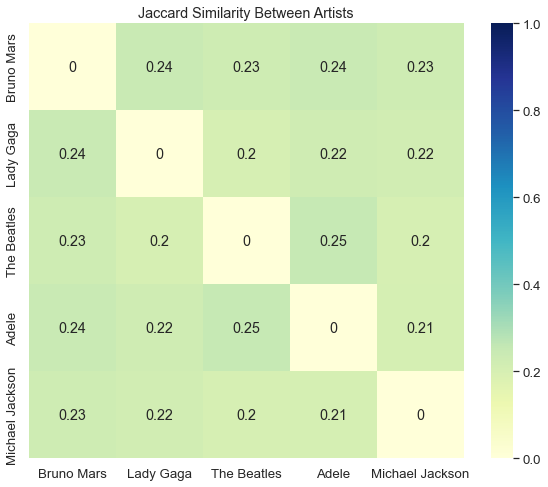

In [116]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sim_matrix = np.zeros((5,5))

for i in range(len(signatures)):
    for j in range(i+1, len(signatures)):
        sim = len(signatures[i].intersection(signatures[j])) / len(signatures[i].union(signatures[j]))
        sim_matrix[i][j] = sim
        sim_matrix[j][i] = sim

sns.set(font_scale=1.2)
sns.set_style("white")
plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=1, square=True, xticklabels=["Bruno Mars", "Lady Gaga", "The Beatles", "Adele", "Michael Jackson"], yticklabels=["Bruno Mars", "Lady Gaga", "The Beatles", "Adele", "Michael Jackson"])
plt.title("Jaccard Similarity Between Artists")
plt.show()

In [117]:
bruno_path = 'bruno-mars.txt'
ladygg_path = 'lady-gaga.txt'
beatles_path = 'beatles.txt'
adele_path = 'adele.txt'
michaeljackson_path = 'michael-jackson.txt'

def read_words_from_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read().rstrip()
        words = set(text.lower().split())
    return words

artists = {
    'Bruno Mars': bruno_path,
    'Lady Gaga': ladygg_path,
    'The Beatles': beatles_path,
    'Adele': adele_path,
    'Michael Jackson': michaeljackson_path
}

for artist1_name, artist1_path in artists.items():
    for artist2_name, artist2_path in artists.items():
        if artist1_name >= artist2_name:
            continue
        artist1_words = read_words_from_file(artist1_path)
        artist2_words = read_words_from_file(artist2_path)
        intersection = len(artist1_words.intersection(artist2_words))
        union = len(artist1_words.union(artist2_words))
        similarity = intersection / union
        print(f"Jaccard similarity between {artist1_name} and {artist2_name}: {similarity}")


Jaccard similarity between Bruno Mars and Lady Gaga: 0.2435399039560942
Jaccard similarity between Bruno Mars and The Beatles: 0.22684414864115363
Jaccard similarity between Bruno Mars and Michael Jackson: 0.2270367054610564
Jaccard similarity between Lady Gaga and The Beatles: 0.20244200244200244
Jaccard similarity between Lady Gaga and Michael Jackson: 0.21758569299552907
Jaccard similarity between Adele and Bruno Mars: 0.24483687518706973
Jaccard similarity between Adele and Lady Gaga: 0.22283464566929134
Jaccard similarity between Adele and The Beatles: 0.2512873326467559
Jaccard similarity between Adele and Michael Jackson: 0.20587651379789557
Jaccard similarity between Michael Jackson and The Beatles: 0.20170616113744075


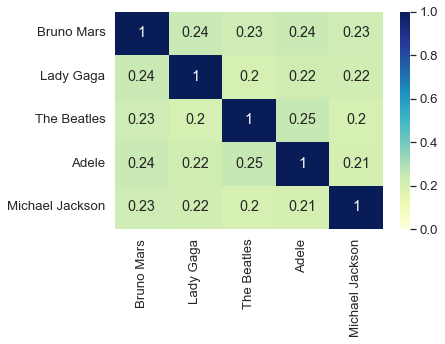

In [119]:
similarity_dict = {
    'Bruno Mars': {'Bruno Mars': 1, 'Lady Gaga': 0.2435399039560942, 'The Beatles': 0.22684414864115363, 'Adele': 0.24483687518706973, 'Michael Jackson': 0.2270367054610564},
    'Lady Gaga': {'Bruno Mars': 0.2435399039560942, 'Lady Gaga': 1, 'The Beatles': 0.20244200244200244, 'Adele': 0.22283464566929134, 'Michael Jackson': 0.21758569299552907},
    'The Beatles': {'Bruno Mars': 0.22684414864115363, 'Lady Gaga': 0.20244200244200244, 'The Beatles': 1, 'Adele': 0.2512873326467559, 'Michael Jackson': 0.20170616113744075},
    'Adele': {'Bruno Mars': 0.24483687518706973, 'Lady Gaga': 0.22283464566929134, 'The Beatles': 0.2512873326467559, 'Adele': 1, 'Michael Jackson': 0.20587651379789557},
    'Michael Jackson': {'Bruno Mars': 0.2270367054610564, 'Lady Gaga': 0.21758569299552907, 'The Beatles': 0.20170616113744075, 'Adele': 0.20587651379789557, 'Michael Jackson': 1}
}

similarity_df = pd.DataFrame.from_dict(similarity_dict)

sns.heatmap(similarity_df, cmap='YlGnBu', annot=True, vmin=0, vmax=1)
plt.show()


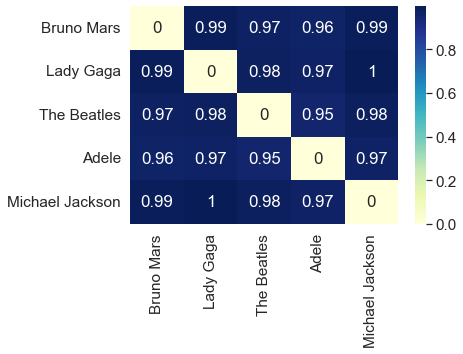

In [137]:
from BitVector import BitVector
import mmh3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bruno_path = 'bruno-mars.txt'
ladygg_path = 'lady-gaga.txt'
beatles_path = 'beatles.txt'
adele_path = 'adele.txt'
michaeljackson_path = 'michael-jackson.txt'

def read_words_from_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read().rstrip()
        words = set(text.lower().split())
    return words

def jaccard_similarity_bloom_filter(set1, set2, m=5000, k=10):
    b1 = BitVector(size=m)
    b2 = BitVector(size=m)
    for word in set1:
        for i in range(k):
            index = mmh3.hash(word, i) % m
            b1[index] = 1
    for word in set2:
        for i in range(k):
            index = mmh3.hash(word, i) % m
            b2[index] = 1
    intersection = (b1 & b2).count_bits()
    union = (b1 | b2).count_bits()
    return intersection / union

artists = {
    'Bruno Mars': bruno_path,
    'Lady Gaga': ladygg_path,
    'The Beatles': beatles_path,
    'Adele': adele_path,
    'Michael Jackson': michaeljackson_path
}

similarity_matrix = np.zeros((len(artists), len(artists)))
for i, artist1_name in enumerate(artists.keys()):
    for j, artist2_name in enumerate(artists.keys()):
        if i >= j:
            continue
        artist1_words = read_words_from_file(artists[artist1_name])
        artist2_words = read_words_from_file(artists[artist2_name])
        similarity = jaccard_similarity_bloom_filter(artist1_words, artist2_words)
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity

df = pd.DataFrame(similarity_matrix, index=artists.keys(), columns=artists.keys())

sns.heatmap(df, cmap="YlGnBu", annot=True)
plt.show()
